In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [89]:
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'PG', 'NFLX', 'IBM', 'NVDA', 'INTC']

In [90]:
start_date = "2019-01-01"
end_date = "2023-03-31"

In [91]:
stock_data = yf.download(symbols, start=start_date, end=end_date)
stock_data=stock_data['Open']
stock_data.head()

[*********************100%%**********************]  10 of 10 completed


Ticker,AAPL,AMZN,GOOGL,IBM,INTC,MSFT,NFLX,NVDA,PG,TSLA
Date,,,,,,,,,,
2019-01-02,38.722500,73.260002,51.360001,107.084129,45.959999,99.550003,259.279999,32.660000,91.029999,20.406668
2019-01-03,35.994999,76.000504,52.533501,109.493309,46.150002,100.099998,270.200012,33.447498,90.940002,20.466667
2019-01-04,36.132500,76.500000,52.127998,109.856598,45.840000,99.720001,281.880005,32.735001,90.839996,20.400000
2019-01-07,37.174999,80.115501,54.048500,112.332695,47.099998,101.639999,302.100006,34.625000,91.910004,21.448000
2019-01-08,37.389999,83.234497,54.299999,114.397705,47.799999,103.040001,319.980011,36.672501,92.699997,22.797333


In [92]:
len(stock_data)

1069

In [93]:
returns=(stock_data/stock_data.shift(-1000)-1)

In [94]:
returns=returns.head(60)

In [95]:
len(returns)

60

In [96]:
C=(np.array(returns.cov()))

In [97]:
print(C)

[[ 1.39775494e-04  3.96416831e-04  2.49681895e-04  4.57965874e-04
   6.33659911e-04  1.76495846e-04  7.26976947e-04  1.01800184e-06
   1.91855753e-04 -2.86251776e-05]
 [ 3.96416831e-04  4.58306887e-03  1.72461991e-03 -1.33192304e-03
   3.07754009e-03  9.04000298e-04  4.44162642e-03  1.14056008e-03
  -1.18520082e-03  1.22392825e-03]
 [ 2.49681895e-04  1.72461991e-03  1.14965681e-03  7.90859363e-04
   3.73978708e-03  5.16223196e-04  2.33071755e-03  4.76961659e-05
   2.43969976e-04 -9.98082009e-05]
 [ 4.57965874e-04 -1.33192304e-03  7.90859363e-04  8.28559417e-03
   9.27019002e-03  2.05626775e-04  3.19422636e-03 -2.03490729e-03
   4.51296769e-03 -2.97940468e-03]
 [ 6.33659911e-04  3.07754009e-03  3.73978708e-03  9.27019002e-03
   2.82419932e-02  8.11595088e-04  8.87650585e-03 -2.15254572e-03
   5.15886293e-03 -3.62593424e-03]
 [ 1.76495846e-04  9.04000298e-04  5.16223196e-04  2.05626775e-04
   8.11595088e-04  3.95239305e-04  1.13343301e-03  1.68086213e-04
  -3.26775204e-05  1.36229690e-04

In [98]:
M=np.array(returns.mean())
print(M)

[-0.70410224 -0.11493966 -0.39504273 -0.06103152  0.83717342 -0.5619796
  0.06321418 -0.80016493 -0.32229105 -0.87009367]


In [99]:
def minvarwts(myuv,m,C):
  m=np.array(m)
  n=len(m)
  u=np.array(np.ones(n))
  uT=u.reshape(-1,1)
  C_inv=np.linalg.inv(C)
  mT=m.reshape(-1,1)
  a=u@C_inv@(uT)
  b=u@C_inv@(mT)
  c=m@C_inv@(uT)
  d=m@C_inv@(mT)

  p=d-myuv*b
  q=a*myuv-c
  r=a*d-b*c
  w=(p*(u@C_inv)+q*(m@C_inv))/r

  return np.array(w)

In [100]:
def minvarline(M,C):
  risk=[]
  weights=[]
  testreturns=np.arange(0,0.8,0.0001)
  returns=[]
  for myu in testreturns:
    w=minvarwts(myu,M,C)
    weights.append(w)
    sigma=np.power((w)@(C)@(w.T),0.5)
    returns.append(myu)
    risk.append(sigma)

  weights=np.array(weights)
  return risk,returns,weights

In [101]:
riskall,returnsall,weightsall=minvarline(M,C)
print("minimum variance portfolio:")
minrisk=np.argmin(riskall)
print("["+str(riskall[minrisk])+","+str(returnsall[minrisk])+str("]"))

minimum variance portfolio:
[0.029655912407237122,0.0]


[0.01324613]
[-0.4320321]


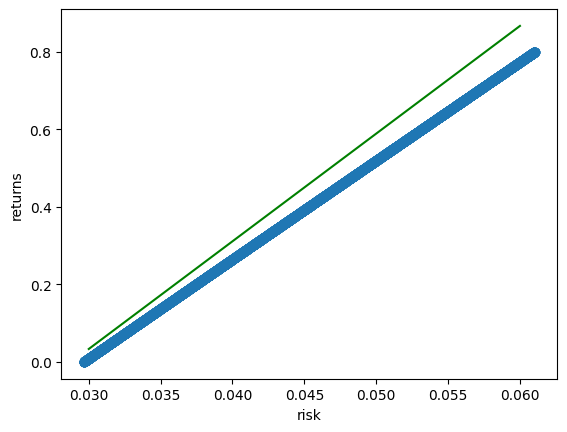

In [110]:


rf=-0.8
C_inv=np.linalg.inv(C)
u=np.ones(10)
wm=(M-rf*u)@C_inv
wm=wm/np.sum(wm)
wmT=wm.reshape(-1,1)
M=np.array(M)
MT=M.reshape(-1,1)

sigmam=np.power(wm@C@wmT,0.5)
print(sigmam)
myum=wm@MT
print(myum)
x=[0.03,0.06]
y=[((myum-rf)*(0.03)/sigmam)+rf,((myum-rf)*(0.06)/sigmam)+rf]
plt.xlabel('risk')
plt.ylabel('returns')
plt.plot(x,y,color='green')
plt.scatter(riskall,returnsall)
plt.show()

In [111]:
print("Market portfolio:")
print("["+str(sigmam)+str(",")+str(myum)+str("]"))

Market portfolio:
[[0.01324613],[-0.4320321]]


In [112]:
#security market line

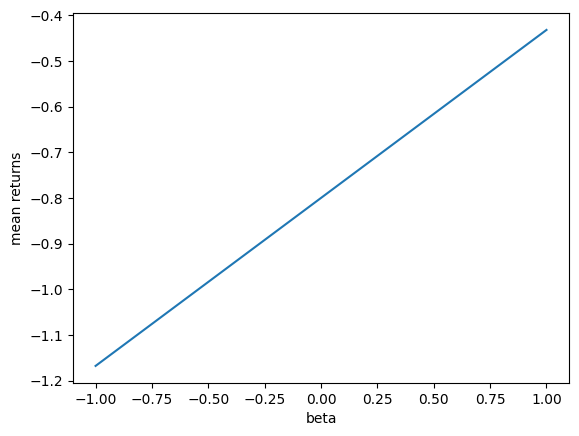

In [113]:
plt.xlabel('beta')
plt.ylabel('mean returns')
beta=[-1,1]
returnss=(myum-rf)*beta+rf
plt.plot(beta,returnss)